In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 경고 무시
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='geopandas')

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1= pd.read_csv('../data/1-12.공공주택임대_정보(화성시).csv')
df2= pd.read_csv('../data/1-13.공공주택임대_임대료(화성시).csv')
df4= pd.read_csv('../data/1-11.화성시_공유차량_이용현황.csv')
df5 = gpd.read_file('../data/1-14.화성시_격자.geojson')
df6 = pd.read_csv('../data/화성인구+블록코드_all.csv')

df_공공주택임대정보 = df1.copy()
df_공공주택임대료 = df2.copy()
df_공유차량 = df4.copy()
df_map = df5.copy()
df_화성인구 = df6.copy()

In [3]:
# column명 변경
df_공공주택임대정보.columns=['단지코드','단지명','지원유형','세대수','주차면수','경도','위도']
df_공공주택임대료.columns=['단지코드','단지명','지원유형','단지평수','월세','경도','위도']
df_공유차량.columns=['단지명', '단지코드', '이용건수_2008', '이용시간_2008', '이용건수_2009', '이용시간_2009', 
               '이용건수_2010', '이용시간_2010', '이용건수_2011', '이용시간_2011', '이용건수_2012', '이용시간_2012',
               '이용건수_2101', '이용시간_2101', '이용건수_2102', '이용시간_2102', '이용건수_2103', '이용시간_2103',
               '이용건수_2104', '이용시간_2104', '이용건수_2105', '이용시간_2105', '이용건수_2106', '이용시간_2106',
               '이용건수_2107', '이용시간_2107', '이용건수_2108', '이용시간_2108', '이용건수_2109', '이용시간_2109',
               '이용건수_2110', '이용시간_2110', '이용건수_2111', '이용시간_2111', '이용건수_2112', '이용시간_2112',
               '이용건수_2201', '이용시간_2201', '이용건수_2202', '이용시간_2202', '이용건수_2203', '이용시간_2203',
               '이용건수_2204', '이용시간_2204', '이용건수_2205', '이용시간_2205', '이용건수_2206', '이용시간_2206',
               '이용건수_2207', '이용시간_2207', '이용건수_2208', '이용시간_2208', '이용건수_2209', '이용시간_2209',
               '이용건수_2210', '이용시간_2210', '이용건수_2211', '이용시간_2211', '이용건수_2212', '이용시간_2212',
               '이용건수_2301', '이용시간_2301', '이용건수_2302', '이용시간_2302', '이용건수_2303', '이용시간_2303',
               '이용건수_2304', '이용시간_2304', '이용건수_2305', '이용시간_2305', '이용건수_2306', '이용시간_2306',
               '이용건수_2307', '이용시간_2307', '이용건수_2308', '이용시간_2308', '이용건수_2309', '이용시간_2309',
               '이용건수_2310', '이용시간_2310', '이용건수_2311', '이용시간_2311', '이용건수_2312', '이용시간_2312',
               '전체이용건수', '전체이용시간', '차량유형', '설치대수']

In [4]:
# 공공임대주택정보 + 임대료
df_공공주택 = df_공공주택임대정보.merge(df_공공주택임대료, on=['단지명','지원유형','위도','경도','단지코드'], how='outer')
df_공공주택

,단지코드,단지명,지원유형,세대수,주차면수,경도,위도,단지평수,월세
0,C00414,화성태안12,국민임대,1178,1767.0,127.041121,37.217786,20평 이하,200000
1,C00415,화성태안6,국민임대,990,1485.0,127.049830,37.212454,20평 이하,200000
2,C00416,화성태안8,국민임대,836,1254.0,127.047309,37.215054,20평 이하,290000
3,C00447,화성매송(1단지)(국임),국민임대,649,973.5,126.880070,37.266522,20평 이하,160000
4,C01566,화성동탄7-1(1-1)(7단지 능동),국민임대,682,1023.0,127.060256,37.216649,20평 이하,220000
...,...,...,...,...,...,...,...,...,...
118,C02784,화성비봉 A-5블록 행복·영구임대주택,행복주택,758,1137.0,126.866536,37.248863,20평 이하,170000
119,C02784,화성비봉 A-5블록 행복·영구임대주택,행복주택,758,1137.0,126.866536,37.248863,10평 이하,120000
120,C02784,화성비봉 A-5블록 행복·영구임대주택,영구임대,136,204.0,126.866536,37.248863,10평 이하,70000
121,C02799,화성동탄2 A-54블록 행복주택,행복주택,1350,2025.0,127.143993,37.185721,20평 이하,230000


In [5]:
cnt= [col for col in df_공유차량.columns if col.startswith('이용건수_')]
tm= [col for col in df_공유차량.columns if col.startswith('이용시간_')]
df_공유차량[cnt] = df_공유차량[cnt].fillna(0)
df_공유차량[tm] = df_공유차량[tm].fillna(0)
df_공유차량['차량유형'] = df_공유차량['차량유형'].fillna('폐쇄')
df_공유차량['설치대수'] = df_공유차량['설치대수'].fillna(0)

In [6]:
df_all = df_공공주택.merge(df_공유차량, on=['단지코드'], how='outer')
df_all = df_all.drop('단지명_y', axis=1)
df_all.columns = ['단지코드', '단지명', '지원유형', '세대수', '주차면수', '경도', '위도', '단지평수', '월세',
        '이용건수_2008', '이용시간_2008', '이용건수_2009', '이용시간_2009',
       '이용건수_2010', '이용시간_2010', '이용건수_2011', '이용시간_2011', '이용건수_2012',
       '이용시간_2012', '이용건수_2101', '이용시간_2101', '이용건수_2102', '이용시간_2102',
       '이용건수_2103', '이용시간_2103', '이용건수_2104', '이용시간_2104', '이용건수_2105',
       '이용시간_2105', '이용건수_2106', '이용시간_2106', '이용건수_2107', '이용시간_2107',
       '이용건수_2108', '이용시간_2108', '이용건수_2109', '이용시간_2109', '이용건수_2110',
       '이용시간_2110', '이용건수_2111', '이용시간_2111', '이용건수_2112', '이용시간_2112',
       '이용건수_2201', '이용시간_2201', '이용건수_2202', '이용시간_2202', '이용건수_2203',
       '이용시간_2203', '이용건수_2204', '이용시간_2204', '이용건수_2205', '이용시간_2205',
       '이용건수_2206', '이용시간_2206', '이용건수_2207', '이용시간_2207', '이용건수_2208',
       '이용시간_2208', '이용건수_2209', '이용시간_2209', '이용건수_2210', '이용시간_2210',
       '이용건수_2211', '이용시간_2211', '이용건수_2212', '이용시간_2212', '이용건수_2301',
       '이용시간_2301', '이용건수_2302', '이용시간_2302', '이용건수_2303', '이용시간_2303',
       '이용건수_2304', '이용시간_2304', '이용건수_2305', '이용시간_2305', '이용건수_2306',
       '이용시간_2306', '이용건수_2307', '이용시간_2307', '이용건수_2308', '이용시간_2308',
       '이용건수_2309', '이용시간_2309', '이용건수_2310', '이용시간_2310', '이용건수_2311',
       '이용시간_2311', '이용건수_2312', '이용시간_2312', '전체이용건수', '전체이용시간', '차량유형',
       '설치대수']
df_all

,단지코드,단지명,지원유형,세대수,주차면수,경도,위도,단지평수,월세,이용건수_2008,...,이용건수_2310,이용시간_2310,이용건수_2311,이용시간_2311,이용건수_2312,이용시간_2312,전체이용건수,전체이용시간,차량유형,설치대수
0,C00414,화성태안12,국민임대,1178,1767.0,127.041121,37.217786,20평 이하,200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C00415,화성태안6,국민임대,990,1485.0,127.049830,37.212454,20평 이하,200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C00416,화성태안8,국민임대,836,1254.0,127.047309,37.215054,20평 이하,290000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C00447,화성매송(1단지)(국임),국민임대,649,973.5,126.880070,37.266522,20평 이하,160000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C01566,화성동탄7-1(1-1)(7단지 능동),국민임대,682,1023.0,127.060256,37.216649,20평 이하,220000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,C02784,화성비봉 A-5블록 행복·영구임대주택,행복주택,758,1137.0,126.866536,37.248863,20평 이하,170000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,C02784,화성비봉 A-5블록 행복·영구임대주택,행복주택,758,1137.0,126.866536,37.248863,10평 이하,120000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,C02784,화성비봉 A-5블록 행복·영구임대주택,영구임대,136,204.0,126.866536,37.248863,10평 이하,70000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,C02799,화성동탄2 A-54블록 행복주택,행복주택,1350,2025.0,127.143993,37.185721,20평 이하,230000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_공유차량_공공주택 = df_all[df_all.전체이용건수.notna()].drop(['월세', '단지평수'], axis=1).drop_duplicates().reset_index(drop=True)
df_공유차량_공공주택

,단지코드,단지명,지원유형,세대수,주차면수,경도,위도,이용건수_2008,이용시간_2008,이용건수_2009,...,이용건수_2310,이용시간_2310,이용건수_2311,이용시간_2311,이용건수_2312,이용시간_2312,전체이용건수,전체이용시간,차량유형,설치대수
0,C01569,화성동탄7-2(1-5)(7단지 능동),국민임대,963,1444.5,127.061128,37.211268,45.0,142.0,44.0,...,23.0,37.0,25.0,29.0,27.0,50.0,1377.0,3912.0,더뉴레이,1.0
1,C01571,화성동탄5-2(4-6)(5단지 새강),국민임대,2342,3513.0,127.069179,37.193522,70.0,226.0,51.0,...,47.0,121.0,50.0,121.0,45.0,102.0,1630.0,5639.0,더뉴레이/올뉴K3,2.0
2,C01574,화성봉담(2단지 동화)(국임),국민임대,915,1372.5,126.960738,37.218666,17.0,47.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,925.0,3028.0,폐쇄,0.0
3,C01588,화성향남(5단지 한우물)(국임),국민임대,1150,1725.0,126.915635,37.124382,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,148.0,879.0,폐쇄,0.0
4,C01589,화성향남(6단지 한우물)(국임),국민임대,1330,1995.0,126.918489,37.124146,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,195.0,1027.0,폐쇄,0.0
5,C01873,화성동탄2 A24블럭(4단지)(국임/영구),국민임대,1547,2320.5,127.121597,37.206009,24.0,52.0,30.0,...,24.0,39.0,52.0,131.0,53.0,143.0,2142.0,6802.0,모닝어반/올뉴K3,2.0
6,C01873,화성동탄2 A24블럭(4단지)(국임/영구),영구임대,600,900.0,127.121597,37.206009,24.0,52.0,30.0,...,24.0,39.0,52.0,131.0,53.0,143.0,2142.0,6802.0,모닝어반/올뉴K3,2.0
7,C01890,화성동탄2 A65블럭(26단지 레이크빌),공공임대,754,1131.0,127.103636,37.176328,13.0,26.0,19.0,...,8.0,21.0,4.0,3.0,0.0,0.0,937.0,2590.0,올뉴모닝,1.0
8,C01961,화성남양뉴타운(LH4단지)(국임),국민임대,876,1314.0,126.829787,37.210028,25.0,224.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,104.0,645.0,폐쇄,0.0
9,C01973,화성향남2(5단지 서봉)(국임),국민임대,1242,1863.0,126.906221,37.115500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.0,1587.0,폐쇄,0.0


## 시각화

In [8]:
df_공유차량_공공주택_폐쇄= df_공유차량_공공주택[df_공유차량_공공주택.차량유형 == '폐쇄']
df_공유차량_공공주택_폐쇄

,단지코드,단지명,지원유형,세대수,주차면수,경도,위도,이용건수_2008,이용시간_2008,이용건수_2009,...,이용건수_2310,이용시간_2310,이용건수_2311,이용시간_2311,이용건수_2312,이용시간_2312,전체이용건수,전체이용시간,차량유형,설치대수
2,C01574,화성봉담(2단지 동화)(국임),국민임대,915,1372.5,126.960738,37.218666,17.0,47.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,925.0,3028.0,폐쇄,0.0
3,C01588,화성향남(5단지 한우물)(국임),국민임대,1150,1725.0,126.915635,37.124382,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,148.0,879.0,폐쇄,0.0
4,C01589,화성향남(6단지 한우물)(국임),국민임대,1330,1995.0,126.918489,37.124146,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,195.0,1027.0,폐쇄,0.0
8,C01961,화성남양뉴타운(LH4단지)(국임),국민임대,876,1314.0,126.829787,37.210028,25.0,224.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,104.0,645.0,폐쇄,0.0
9,C01973,화성향남2(5단지 서봉)(국임),국민임대,1242,1863.0,126.906221,37.115500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.0,1587.0,폐쇄,0.0
12,C02042,화성남양뉴타운(LH9단지)(국임),국민임대,782,1173.0,126.833895,37.209028,11.0,82.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,889.0,2151.0,폐쇄,0.0
13,C02049,화성향남2(18단지 언덕)(국임),국민임대,1742,2613.0,126.896338,37.097377,22.0,111.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,501.0,1770.0,폐쇄,0.0
16,C02140,화성봉담2(LH2단지)(국임),국민임대,1028,1542.0,126.943852,37.221747,51.0,235.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1324.0,5001.0,폐쇄,0.0
18,C02194,화성동탄2 A6블럭(1단지)(국민),국민임대,730,1095.0,127.115160,37.217529,6.0,16.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,565.0,2977.0,폐쇄,0.0
26,C02413,화성동탄2 A77-2블럭(35단지)(국임/영구),영구임대,538,807.0,127.121299,37.164322,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,637.0,2260.0,폐쇄,0.0


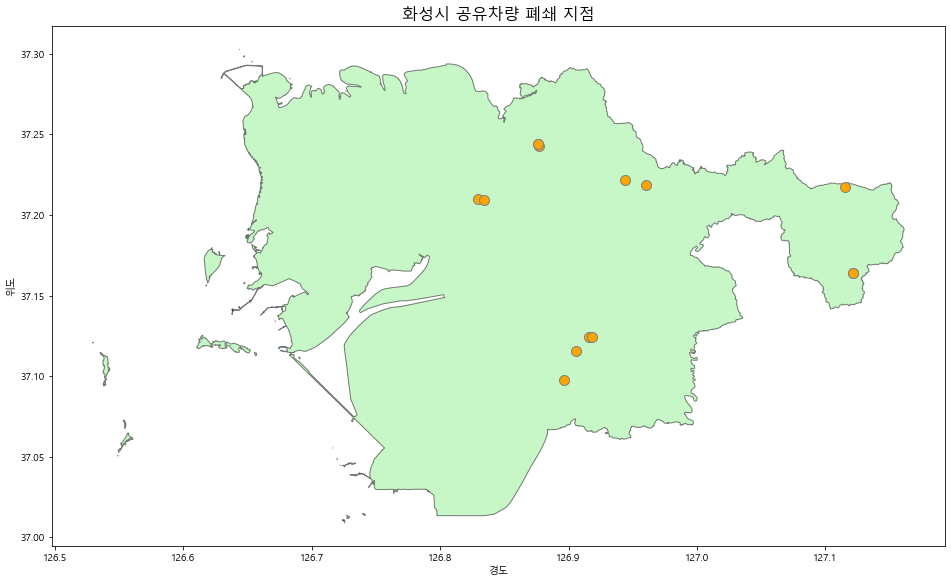

In [17]:
# 화성 지역 데이터 불러오기
shapefile_path = "../data/QGIS/타겟지역.shp"  # shapefile 경로
region = gpd.read_file(shapefile_path)

# 화성시 데이터만 불러오기
region_h = region[region['SGG_NM']=='경기도 화성시']

# df_log의 lat, lon을 geometry로 변환
geometry = [Point(xy) for xy in zip(df_공유차량_공공주택_폐쇄['경도'], df_공유차량_공공주택_폐쇄['위도'])]
gdf_log = gpd.GeoDataFrame(df_공유차량_공공주택_폐쇄, geometry=geometry, crs="EPSG:4326")  # 좌표계 설정

# 지도 시각화
fig, ax = plt.subplots(figsize=(16, 10))


# 화성 지도 가져오기
region_h.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5)

# DataFrame 점 데이터 시각화
scatter = gdf_log.plot(
    ax=ax,
    color = 'orange',
    markersize=100,
    legend=True,
    alpha=1.0,
    edgecolor = 'grey'
)

# 제목 및 기타 설정
ax.set_title("화성시 공유차량 폐쇄 지점", fontsize=16)
ax.set_xlabel("경도")
ax.set_ylabel("위도")

plt.show()